# Linear classfier

---------------

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

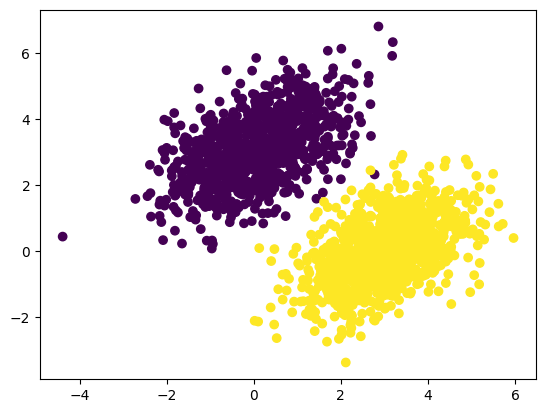

In [2]:
zero_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=1000,
)

one_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=1000,
)

samples = np.vstack((zero_samples, one_samples)).astype(np.float32)

targets = np.vstack((np.zeros((1000, 1), dtype="float32"),
np.ones((1000, 1), dtype="float32")))

plt.scatter(samples[:, 0], samples[:, 1], c=targets)

In [3]:
input_dim = 2
output_dim = 1

W = tf.Variable(
    tf.random.uniform(
        shape=(input_dim, output_dim)
    )
)

b = tf.Variable(
    tf.zeros(
        shape=(output_dim)
    )
)

print(W, "\n\n", b)

def model(input):
    return tf.matmul(input, W) + b

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.1667707 ],
       [0.32405698]], dtype=float32)> 

 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [4]:
print(
    model(
        samples
    )
)

tf.Tensor(
[[1.4957814 ]
 [1.6740025 ]
 [1.0658357 ]
 ...
 [0.83572596]
 [0.6408816 ]
 [0.7405536 ]], shape=(2000, 1), dtype=float32)


In [5]:
def loss_func(predictions, targets):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [6]:
def training_step():
    with tf.GradientTape() as tape:
        predictions = model(samples)
        loss = loss_func(predictions, targets)
    gradient_wrt_W, gradient_wrt_b = tape.gradient(loss, [W, b])
    # 0.1 is Learning rate
    W.assign_sub(gradient_wrt_W * 0.1)
    b.assign_sub(gradient_wrt_b * 0.1)
    return loss

In [7]:
for step in range(40):
    loss = training_step()
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.7980
Loss at step 1: 0.1179
Loss at step 2: 0.0905
Loss at step 3: 0.0824
Loss at step 4: 0.0772
Loss at step 5: 0.0727
Loss at step 6: 0.0687
Loss at step 7: 0.0650
Loss at step 8: 0.0616
Loss at step 9: 0.0585
Loss at step 10: 0.0556
Loss at step 11: 0.0530
Loss at step 12: 0.0506
Loss at step 13: 0.0484
Loss at step 14: 0.0464
Loss at step 15: 0.0446
Loss at step 16: 0.0429
Loss at step 17: 0.0414
Loss at step 18: 0.0400
Loss at step 19: 0.0387
Loss at step 20: 0.0375
Loss at step 21: 0.0364
Loss at step 22: 0.0354
Loss at step 23: 0.0345
Loss at step 24: 0.0337
Loss at step 25: 0.0329
Loss at step 26: 0.0322
Loss at step 27: 0.0316
Loss at step 28: 0.0310
Loss at step 29: 0.0305
Loss at step 30: 0.0300
Loss at step 31: 0.0295
Loss at step 32: 0.0291
Loss at step 33: 0.0287
Loss at step 34: 0.0284
Loss at step 35: 0.0281
Loss at step 36: 0.0278
Loss at step 37: 0.0275
Loss at step 38: 0.0273
Loss at step 39: 0.0271


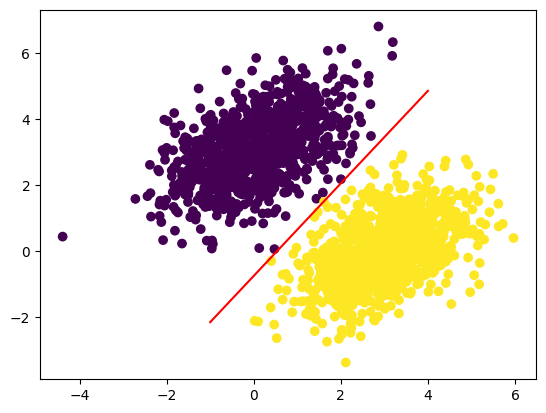

In [14]:
predictions = model(samples)
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(samples[:, 0], samples[:, 1], c=predictions[:, 0] > 0.5)